# OBJECTIVE :-  Implement SGD on Linear Regression

In [1]:
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd

# Loading Boston dataset
from sklearn.datasets import load_boston
boston = load_boston()

# Shape of dataset
print(boston.data.shape)

(506, 13)


In [2]:
# Features of dataset
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
# Shape of target values
print(boston.target.shape)

(506,)


# Implementing SGD on LINEAR REGRESSION

In [0]:
# Feature matrix
data = boston.data

# Standardizing the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

standardised_data = sc.fit_transform(data)

# Adding a new feature to the data which will contain only ones for ease in computation 
additional_feature = np.ones(boston.data.shape[0])


# Matrix having new additional feature X0 which will be multiplied with W0 for the ease of computation
feature_data = np.vstack((additional_feature,standardised_data.T)).T
feature_data 

# Actual prices of houses
target_price = boston.target

# Train and Test split of data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(feature_data, target_price, test_size = 0.3, random_state = 5)

IMPLEMENTING STOCHASTIC GRADIENT DESCENT ALGORITHM

In [5]:
# Initialising weight vector
# Generating 14 normally distributed values

weights = np.random.normal(0,1,feature_data.shape[1])

# Initialised Weights
weights

array([ 1.55779295,  0.39126974,  0.82015474, -0.12551015, -0.57439698,
       -0.90453683,  0.0239233 , -0.04208634, -0.79649857,  0.57470843,
       -1.21107051,  2.00483887,  0.97570768,  0.36821079])

In [0]:
# Temporary vector to store intermediate computed weight values
temp_w = np.zeros(feature_data.shape[1])

# Initialising learning rate
r = 0.001

# Number of training examples
m = X_train.shape[0]

# Code to get batches for Stochastic Gradient Descent

# batch size
batch_size = 20

from numpy import random
random_ids = random.choice(m,m,replace=False)

X_shuffled = X_train[random_ids,:]

y_shuffled = Y_train[random_ids]

mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]


# Number of iterations for training the data
iterations = 1000

# SGD
while(iterations >=0):
    for batch in mini_batches:
        X_batch = batch[0]
        Y_batch = batch[1]
        for j in range(0,feature_data.shape[1]):
            temp_sum = 0
            for i in range(0,X_batch.shape[0]):
                temp_sum += (( (np.sum( sc.inverse_transform(weights[1:14] * X_batch[i,1:])) + weights[0]*X_batch[i,0]) - Y_batch[i]) * X_batch[i,j])
            temp_w[j] = weights[j] - ((r/X_batch.shape[0])*temp_sum)
        weights = temp_w
    iterations -= 1 
    
# Weights of manual sgd
manual_sgd_weights = weights

In [0]:
# Now predicting the house prices on X_test data

manual_sgd_predictions = np.zeros(X_test.shape[0])

for itr in range(0,X_test.shape[0]):
    manual_sgd_predictions[itr] = np.sum(sc.inverse_transform(weights[1:14]*X_test[itr,1:])) + weights[0]*X_test[itr,0]


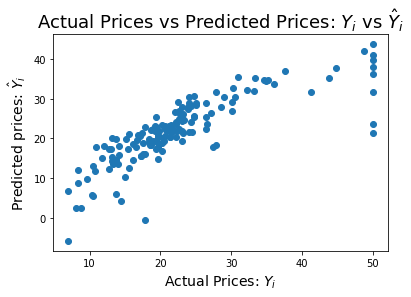

In [8]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Y_test, manual_sgd_predictions)

plt.xlabel("Actual Prices: $Y_i$",size=14)

plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)

plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)

plt.show()

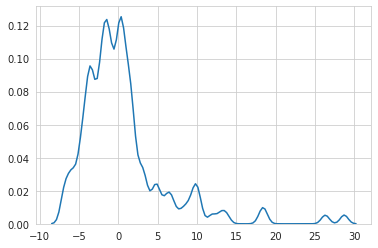

In [9]:
delta_y = Y_test - manual_sgd_predictions;

import seaborn as sns;

import numpy as np;

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


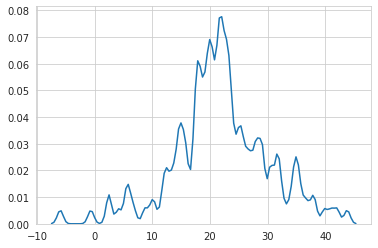

In [10]:
sns.set_style('whitegrid')

sns.kdeplot(np.array(manual_sgd_predictions), bw=0.5)

plt.show()

In [11]:
# Calculating accuracy for Implementation of SGD from Scratch
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation of SGD from Scratch is : ",mean_absolute_error(Y_test, manual_sgd_predictions))

print("Mean Squared Error for Implementation of SGD from Scratch is : ",mean_squared_error(Y_test, manual_sgd_predictions))

print("Root Mean Squared Error for Implementation of SGD from Scratch is : ",np.sqrt(mean_squared_error(Y_test,manual_sgd_predictions)))

Mean Absolute Error for Implementation of SGD from Scratch is :  3.609278714066864
Mean Squared Error for Implementation of SGD from Scratch is :  31.22781775723868
Root Mean Squared Error for Implementation of SGD from Scratch is :  5.588185551432475


In [0]:
# Temporary vector to store intermediate computed weight values
temp_w = np.zeros(feature_data.shape[1])

# Initialising learning rate
r = 0.001

# Number of training examples
m = X_train.shape[0]

# Code to get batches for Stochastic Gradient Descent

# batch size
batch_size = 20

from numpy import random
random_ids = random.choice(m,m,replace=False)

X_shuffled = X_train[random_ids,:]

y_shuffled = Y_train[random_ids]

mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, m, batch_size)]


# Number of iterations for training the data
iterations = 2000

# SGD
while(iterations >=0):
    for batch in mini_batches:
        X_batch = batch[0]
        Y_batch = batch[1]
        for j in range(0,feature_data.shape[1]):
            temp_sum = 0
            for i in range(0,X_batch.shape[0]):
                temp_sum += (( (np.sum( sc.inverse_transform(weights[1:14] * X_batch[i,1:])) + weights[0]*X_batch[i,0]) - Y_batch[i]) * X_batch[i,j])
            temp_w[j] = weights[j] - ((r/X_batch.shape[0])*temp_sum)
        weights = temp_w
    iterations -= 1 
    
# Weights of manual sgd
manual_sgd_weights1 = weights

In [0]:
# Now predicting the house prices on X_test data

manual_sgd_predictions1 = np.zeros(X_test.shape[0])

for itr in range(0,X_test.shape[0]):
    manual_sgd_predictions1[itr] = np.sum(sc.inverse_transform(weights[1:14]*X_test[itr,1:])) + weights[0]*X_test[itr,0]


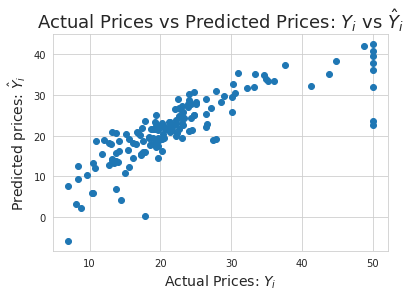

In [14]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Y_test, manual_sgd_predictions1)

plt.xlabel("Actual Prices: $Y_i$",size=14)

plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)

plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)

plt.show()

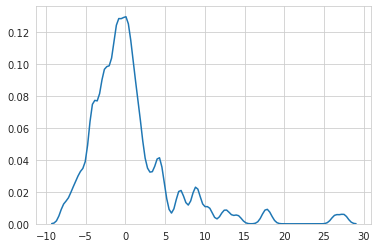

In [15]:
delta_y = Y_test - manual_sgd_predictions1;

import seaborn as sns;

import numpy as np;

sns.set_style('whitegrid')

sns.kdeplot(np.array(delta_y), bw=0.5)

plt.show()


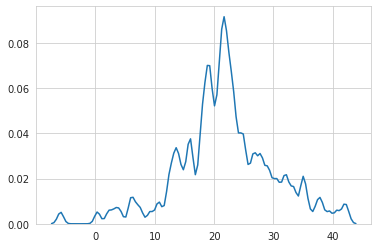

In [16]:
sns.set_style('whitegrid')

sns.kdeplot(np.array(manual_sgd_predictions1), bw=0.5)

plt.show()

In [17]:
# Calculating accuracy for Implementation of SGD from Scratch
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error for Implementation of SGD from Scratch is : ",mean_absolute_error(Y_test, manual_sgd_predictions1))

print("Mean Squared Error for Implementation of SGD from Scratch is : ",mean_squared_error(Y_test, manual_sgd_predictions1))

print("Root Mean Squared Error for Implementation of SGD from Scratch is : ",np.sqrt(mean_squared_error(Y_test,manual_sgd_predictions1)))

Mean Absolute Error for Implementation of SGD from Scratch is :  3.5790471506689503
Mean Squared Error for Implementation of SGD from Scratch is :  30.61803755854694
Root Mean Squared Error for Implementation of SGD from Scratch is :  5.5333568074494295


# Implementing SKLEARN's SGD Regression 

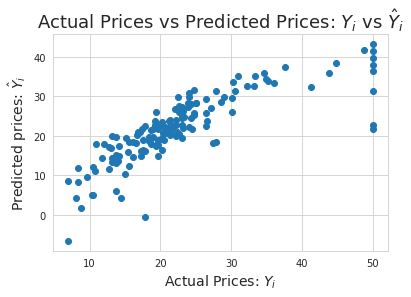

In [18]:
# Implement Sklearn SGD with following parameters as used in manual SGD :
#  (1) No regularization 
#  (2) Learning_rate = 0.001 and
#  (3) Number of iterations = 1000

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.001  )

sgd.fit(X_train, Y_train)

sklearn_sgd_predictions = sgd.predict(X_test)

# Weights of Sklearn's SGD
sklearn_sgd_weights = sgd.coef_ 

plt.scatter(Y_test, sklearn_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

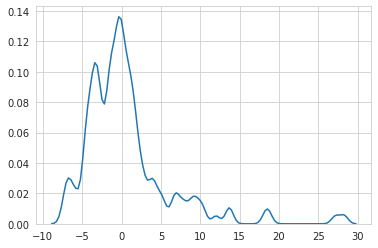

In [19]:
delta_y = Y_test - sklearn_sgd_predictions;

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

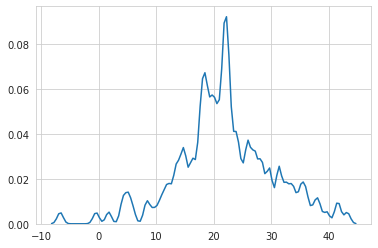

In [20]:
sns.set_style('whitegrid')

sns.kdeplot(np.array(sklearn_sgd_predictions), bw=0.5)
plt.show()

In [21]:
# Calculating accuracy for Implementation of SGD using SKLEARN
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)

print("Mean Absolute Error for Implementation of SGD using SKLEARN is : ",mean_absolute_error(Y_test,sklearn_sgd_predictions))
print("Mean Squared Error for Implementation of SGD using SKLEARN is : ",mean_squared_error(Y_test, sklearn_sgd_predictions))
print("Root Mean Squared Error for Implementation of SGD using SKLEARN is : ",np.sqrt(mean_squared_error(Y_test,sklearn_sgd_predictions)))

Mean Absolute Error for Implementation of SGD using SKLEARN is :  3.6023280752966347
Mean Squared Error for Implementation of SGD using SKLEARN is :  31.49561773479579
Root Mean Squared Error for Implementation of SGD using SKLEARN is :  5.612095663368168


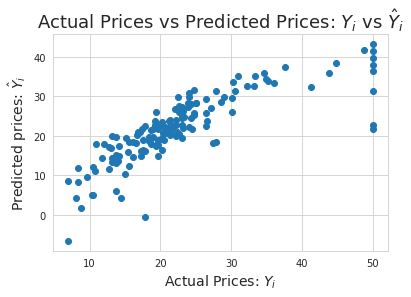

In [22]:
# Implement Sklearn SGD with following parameters as used in manual SGD :
#  (1) No regularization 
#  (2) Learning_rate = 0.001 and
#  (3) Number of iterations = 1000

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='none', max_iter=2000, learning_rate='constant' , eta0=0.001  )

sgd.fit(X_train, Y_train)

sklearn_sgd_predictions1 = sgd.predict(X_test)

# Weights of Sklearn's SGD
sklearn_sgd_weights1 = sgd.coef_ 

plt.scatter(Y_test, sklearn_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

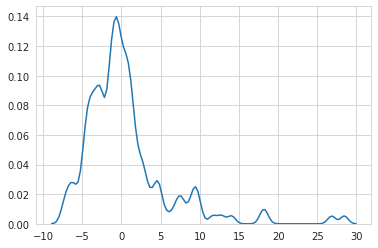

In [23]:
delta_y = Y_test - sklearn_sgd_predictions1;

sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

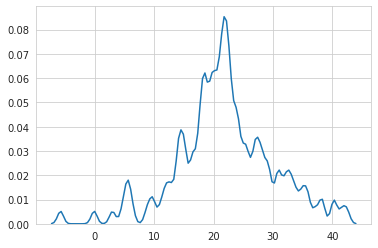

In [24]:
sns.set_style('whitegrid')

sns.kdeplot(np.array(sklearn_sgd_predictions1), bw=0.5)
plt.show()

In [25]:
# Calculating accuracy for Implementation of SGD using SKLEARN
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)

print("Mean Absolute Error for Implementation of SGD using SKLEARN is : ",mean_absolute_error(Y_test,sklearn_sgd_predictions1))
print("Mean Squared Error for Implementation of SGD using SKLEARN is : ",mean_squared_error(Y_test, sklearn_sgd_predictions1))
print("Root Mean Squared Error for Implementation of SGD using SKLEARN is : ",np.sqrt(mean_squared_error(Y_test,sklearn_sgd_predictions1)))

Mean Absolute Error for Implementation of SGD using SKLEARN is :  3.573046831983987
Mean Squared Error for Implementation of SGD using SKLEARN is :  30.907213916631978
Root Mean Squared Error for Implementation of SGD using SKLEARN is :  5.559425682265388


# Comparing the weights produced by both Manual SGD and Sklearn's SGD

In [26]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable

numbering = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("Weights of Manual SGD with 1000 iterations",manual_sgd_weights)
ptable.add_column("Weights of Manual SGD with 2000 iterations",manual_sgd_weights1)
ptable.add_column("Weights of Sklearn's SGD with 1000 iterations",sklearn_sgd_weights)
ptable.add_column("Weights of Sklearn's SGD with 1000 iterations",sklearn_sgd_weights1)


# Printing the Table
print(ptable)

+-------+--------------------------------------------+--------------------------------------------+-----------------------------------------------+-----------------------------------------------+
| S.NO. | Weights of Manual SGD with 1000 iterations | Weights of Manual SGD with 2000 iterations | Weights of Sklearn's SGD with 1000 iterations | Weights of Sklearn's SGD with 1000 iterations |
+-------+--------------------------------------------+--------------------------------------------+-----------------------------------------------+-----------------------------------------------+
|   1   |             -888.6099437221562             |             -888.634243115894              |               11.183201680967903              |               11.189639586177245              |
|   2   |            -0.1445071480776028             |            -0.15961679137915377            |              -1.2913757485944384              |              -1.1862799370989112              |
|   3   |           

# Scatter Plot of the predictions of both manual and sklearn SGD Regression

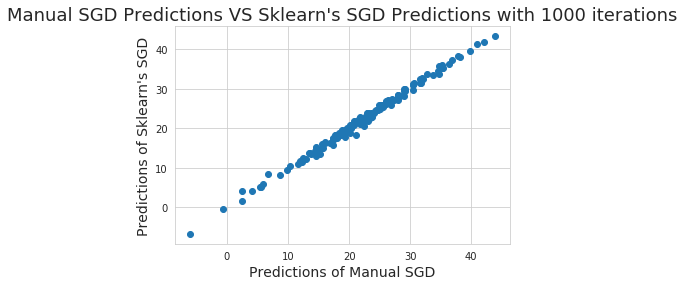

In [27]:
# Scatter Plot of the predictions of both manual SGD Regression and Sklearn's SGD Regression

plt.scatter(manual_sgd_predictions, sklearn_sgd_predictions)

plt.xlabel("Predictions of Manual SGD",size=14)
plt.ylabel("Predictions of Sklearn's SGD",size=14)
plt.title("Manual SGD Predictions VS Sklearn's SGD Predictions with 1000 iterations",size=18)
plt.show()

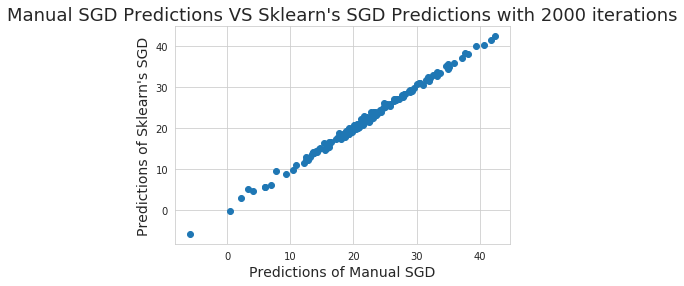

In [28]:
# Scatter Plot of the predictions of both manual SGD Regression and Sklearn's SGD Regression

plt.scatter(manual_sgd_predictions1, sklearn_sgd_predictions1)

plt.xlabel("Predictions of Manual SGD",size=14)
plt.ylabel("Predictions of Sklearn's SGD",size=14)
plt.title("Manual SGD Predictions VS Sklearn's SGD Predictions with 2000 iterations",size=18)
plt.show()

# OBSERVATION :

 By observing the graphs , mean absolute error , mean squared error and root mean squared error for both (Manual sgd Regression and Sklearn's sgd Regression) implementation of SGD we can say that Manual SGD model and Sklearn's SGD model is giving approximately similar results